# Imports

In [1]:
import re
import numpy as np
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, balanced_accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\_param_validation.py:14: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.4)
  from scipy.sparse import csr_matrix, issparse


# EDA SECTION

### Load PAMAP2 Merged Dataset

In [ ]:
df = pd.read_parquet("E:/AAI/AAI530-Data Analytics and Internet of Things/project/PAMAP2_Dataset/pamap2_merged.parquet")

In [ ]:
# Confirm Dataset Structure
df.shape

(2872533, 56)

In [ ]:
df.columns.tolist()

['subject_id',
 'timestamp',
 'activity_id_1',
 'activity_id_2',
 'heart_rate',
 'hand_temp',
 'hand_acc16_x',
 'hand_acc16_y',
 'hand_acc16_z',
 'hand_acc6_x',
 'hand_acc6_y',
 'hand_acc6_z',
 'hand_gyro_x',
 'hand_gyro_y',
 'hand_gyro_z',
 'hand_mag_x',
 'hand_mag_y',
 'hand_mag_z',
 'hand_orient_1',
 'hand_orient_2',
 'hand_orient_3',
 'hand_orient_4',
 'chest_temp',
 'chest_acc16_x',
 'chest_acc16_y',
 'chest_acc16_z',
 'chest_acc6_x',
 'chest_acc6_y',
 'chest_acc6_z',
 'chest_gyro_x',
 'chest_gyro_y',
 'chest_gyro_z',
 'chest_mag_x',
 'chest_mag_y',
 'chest_mag_z',
 'chest_orient_1',
 'chest_orient_2',
 'chest_orient_3',
 'chest_orient_4',
 'ankle_temp',
 'ankle_acc16_x',
 'ankle_acc16_y',
 'ankle_acc16_z',
 'ankle_acc6_x',
 'ankle_acc6_y',
 'ankle_acc6_z',
 'ankle_gyro_x',
 'ankle_gyro_y',
 'ankle_gyro_z',
 'ankle_mag_x',
 'ankle_mag_y',
 'ankle_mag_z',
 'ankle_orient_1',
 'ankle_orient_2',
 'ankle_orient_3',
 'ankle_orient_4']

### Data Inspection

In [ ]:
df.head()

,subject_id,timestamp,activity_id_1,activity_id_2,heart_rate,hand_temp,hand_acc16_x,hand_acc16_y,hand_acc16_z,hand_acc6_x,...,ankle_gyro_x,ankle_gyro_y,ankle_gyro_z,ankle_mag_x,ankle_mag_y,ankle_mag_z,ankle_orient_1,ankle_orient_2,ankle_orient_3,ankle_orient_4
0,101,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,NaN
1,101,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,NaN
2,101,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,NaN
3,101,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,NaN
4,101,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,NaN


In [ ]:
df.dtypes

subject_id          int64
timestamp         float64
activity_id_1       int64
activity_id_2     float64
heart_rate        float64
hand_temp         float64
hand_acc16_x      float64
hand_acc16_y      float64
hand_acc16_z      float64
hand_acc6_x       float64
hand_acc6_y       float64
hand_acc6_z       float64
hand_gyro_x       float64
hand_gyro_y       float64
hand_gyro_z       float64
hand_mag_x        float64
hand_mag_y        float64
hand_mag_z        float64
hand_orient_1     float64
hand_orient_2     float64
hand_orient_3     float64
hand_orient_4     float64
chest_temp        float64
chest_acc16_x     float64
chest_acc16_y     float64
chest_acc16_z     float64
chest_acc6_x      float64
chest_acc6_y      float64
chest_acc6_z      float64
chest_gyro_x      float64
chest_gyro_y      float64
chest_gyro_z      float64
chest_mag_x       float64
chest_mag_y       float64
chest_mag_z       float64
chest_orient_1    float64
chest_orient_2    float64
chest_orient_3    float64
chest_orient

In [ ]:
# Create new datetime column (missing) because that's what Pandas expects
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')

In [ ]:
df[['timestamp','datetime']].head()
df.dtypes

subject_id                 int64
timestamp                float64
activity_id_1              int64
activity_id_2            float64
heart_rate               float64
hand_temp                float64
hand_acc16_x             float64
hand_acc16_y             float64
hand_acc16_z             float64
hand_acc6_x              float64
hand_acc6_y              float64
hand_acc6_z              float64
hand_gyro_x              float64
hand_gyro_y              float64
hand_gyro_z              float64
hand_mag_x               float64
hand_mag_y               float64
hand_mag_z               float64
hand_orient_1            float64
hand_orient_2            float64
hand_orient_3            float64
hand_orient_4            float64
chest_temp               float64
chest_acc16_x            float64
chest_acc16_y            float64
chest_acc16_z            float64
chest_acc6_x             float64
chest_acc6_y             float64
chest_acc6_z             float64
chest_gyro_x             float64
chest_gyro

In [ ]:
# Sort by subject and time
df = df.sort_values(['subject_id', 'datetime']).reset_index(drop=True)

In [ ]:
df.groupby('subject_id')['timestamp'].apply(lambda x: x.is_monotonic_increasing).head()

subject_id
101    True
102    True
103    True
104    True
105    True
Name: timestamp, dtype: bool

### Missing Values

In [ ]:
# Check missing values
df.isna().sum().sort_values(ascending=False).head(15)

ankle_orient_4    2872533
activity_id_2     2610265
hand_acc16_y        13141
hand_acc16_x        13141
heart_rate          13141
hand_acc16_z        13141
hand_acc6_z         13141
hand_acc6_y         13141
hand_temp           13141
hand_mag_z          13141
hand_orient_1       13141
hand_orient_2       13141
hand_gyro_x         13141
hand_gyro_y         13141
hand_gyro_z         13141
dtype: int64

In [ ]:
# Forward-fill missing values per subject
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

df[numeric_cols] = df.groupby('subject_id')[numeric_cols].ffill()

In [ ]:
# Back-fill remaining leading NaNs per subject
df[numeric_cols] = df.groupby('subject_id')[numeric_cols].bfill()

In [ ]:
# Confirm missing values are gone
df.isna().sum().sum()

np.int64(2872533)

In [ ]:
# Find which columns still contain NaNs
df.isna().sum().sort_values(ascending=False).head(10)

ankle_orient_4    2872533
timestamp               0
activity_id_1           0
activity_id_2           0
heart_rate              0
hand_temp               0
hand_acc16_x            0
hand_acc16_y            0
subject_id              0
hand_acc6_x             0
dtype: int64

In [ ]:
df.isna().sum().sort_values(ascending=False).head(15)

ankle_orient_4    2872533
timestamp               0
activity_id_1           0
activity_id_2           0
heart_rate              0
hand_temp               0
hand_acc16_x            0
hand_acc16_y            0
subject_id              0
hand_acc6_x             0
hand_acc6_y             0
hand_acc6_z             0
hand_gyro_x             0
hand_gyro_y             0
hand_gyro_z             0
dtype: int64

We can see that ankle_orient_4 is 100% missing. This is normal and documented behavior for the PAMAP2 dataset. So let's drop it entirely.

In [ ]:
df = df.drop(columns=['ankle_orient_4'])

In [ ]:
df.isna().sum().sum()

np.int64(0)

Perfect, nothing missing now!

## **Start of EDA...**

### Class Imbalance

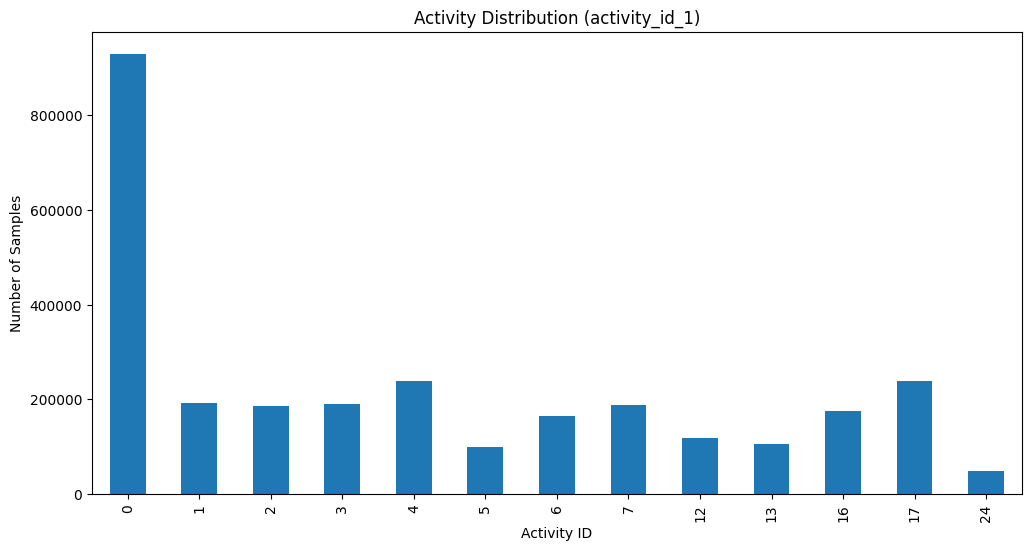

In [ ]:
plt.figure(figsize=(12,6))
df['activity_id_1'].value_counts().sort_index().plot(kind='bar')
plt.title("Activity Distribution (activity_id_1)")
plt.xlabel("Activity ID")
plt.ylabel("Number of Samples")
plt.show()

EDA conclusion so far is that dataset is highly imbalanced, dominated by 0 (unknown).

### Heart Rate Analysis

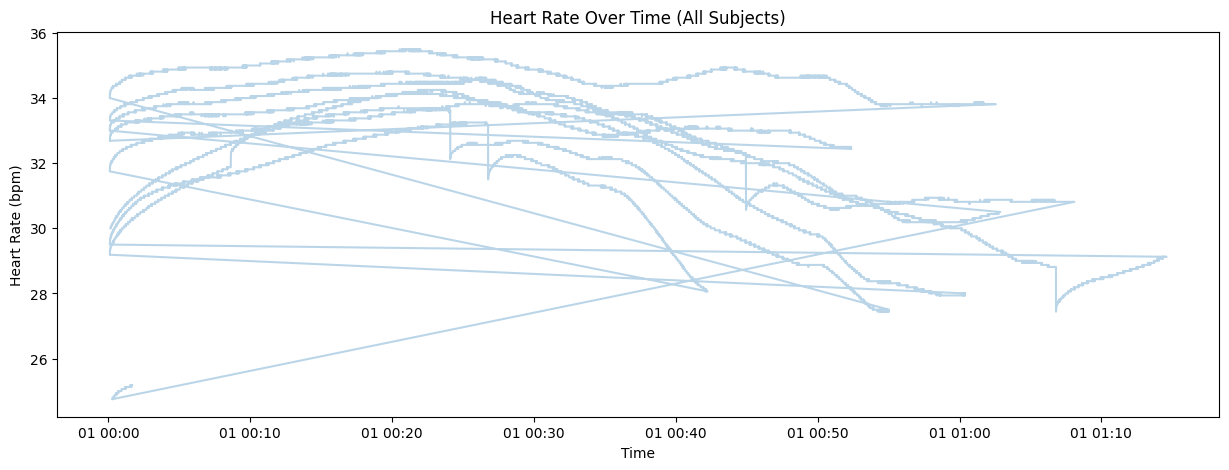

In [ ]:
# Plot heart rate over time
plt.figure(figsize=(15,5))
plt.plot(df['datetime'], df['heart_rate'], alpha=0.3)
plt.title("Heart Rate Over Time (All Subjects)")
plt.xlabel("Time")
plt.ylabel("Heart Rate (bpm)")
plt.show()

<Figure size 1200x600 with 0 Axes>

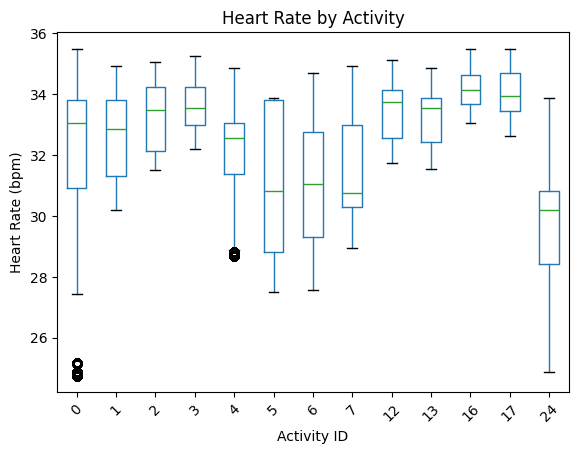

In [ ]:
plt.figure(figsize=(12,6))
df.boxplot(column='heart_rate', by='activity_id_1', grid=False, rot=45)
plt.title("Heart Rate by Activity")
plt.suptitle("")  # removes extra automatic title
plt.xlabel("Activity ID")
plt.ylabel("Heart Rate (bpm)")
plt.show()

Conclusion for Heart-Rate EDA:

- Activity labels are valid
- Activity 24 is a "mixed behavior" label
- HR separates clearly for major activities
- Activity 0 and 24 behave like "background/transition"
- Nothing appears strange or erroneous

### Acceleration Magnitude

In [ ]:
# Compute Acceleration Magnitude
df['hand_acc_mag'] = np.sqrt(
    df['hand_acc16_x']**2 +
    df['hand_acc16_y']**2 +
    df['hand_acc16_z']**2
)

df['chest_acc_mag'] = np.sqrt(
    df['chest_acc16_x']**2 +
    df['chest_acc16_y']**2 +
    df['chest_acc16_z']**2
)

df['ankle_acc_mag'] = np.sqrt(
    df['ankle_acc16_x']**2 +
    df['ankle_acc16_y']**2 +
    df['ankle_acc16_z']**2
)

<Figure size 1200x600 with 0 Axes>

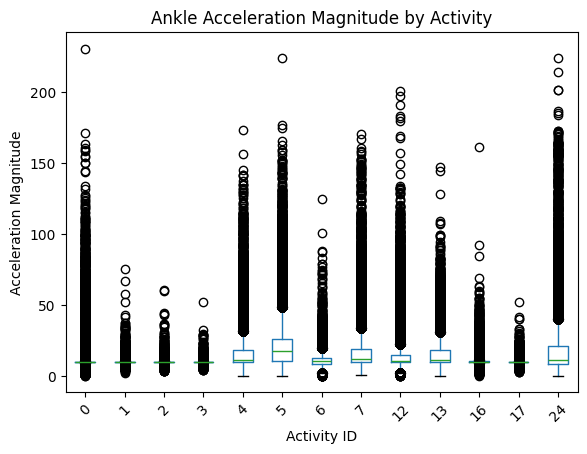

In [ ]:
plt.figure(figsize=(12,6))
df.boxplot(column='ankle_acc_mag', by='activity_id_1', grid=False, rot=45)
plt.title("Ankle Acceleration Magnitude by Activity")
plt.suptitle("")
plt.xlabel("Activity ID")
plt.ylabel("Acceleration Magnitude")
plt.show()

Conclusion for Acceleration Magnitude:
- Activities have clear separability
- Activity 0 is noisy and non-specific

### Correlation Heatmap

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_statistics.py:32: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.4)
  from scipy.stats import gaussian_kde


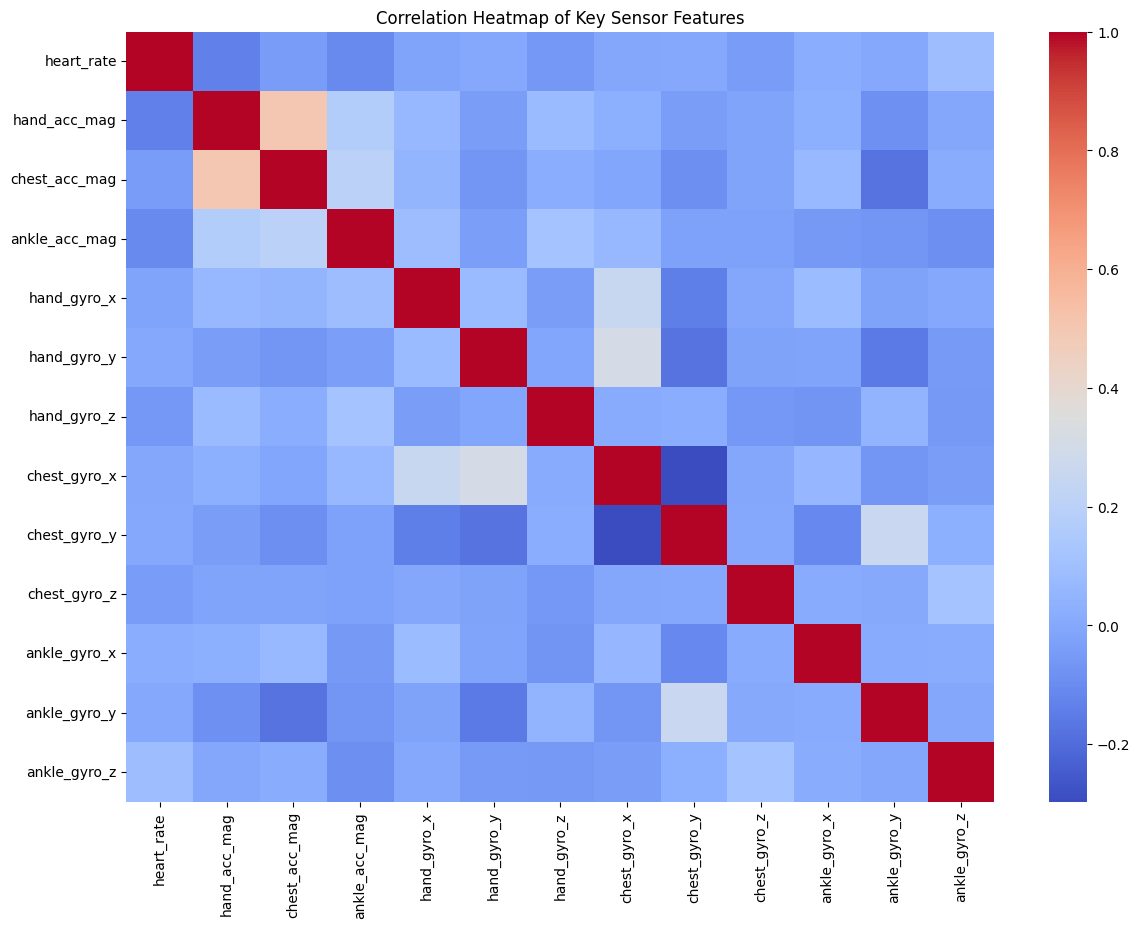

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(14,10))

# Use only a subset to avoid memory overload
subset = df[['heart_rate',
             'hand_acc_mag', 'chest_acc_mag', 'ankle_acc_mag',
             'hand_gyro_x', 'hand_gyro_y', 'hand_gyro_z',
             'chest_gyro_x', 'chest_gyro_y', 'chest_gyro_z',
             'ankle_gyro_x', 'ankle_gyro_y', 'ankle_gyro_z']]

corr = subset.corr()

sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of Key Sensor Features")
plt.show()

Conclusion for Heat Map:
- Hand_acc_mag has the highest correlation with heart rate (but still weak)
- Ankle_acc_mag has the weakest (slight negative)
- Weak HR correlations

### Subject Drift & Individual Differences

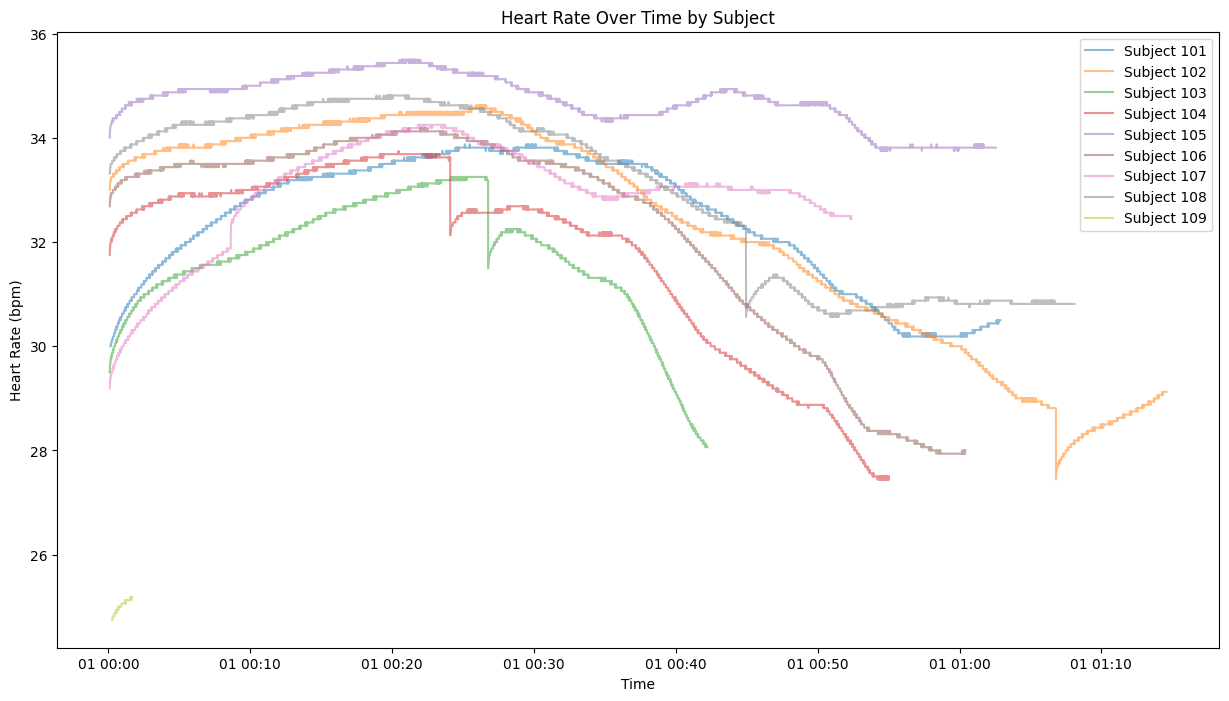

In [ ]:
# Subject Drift & Individual Differences
# Heart Rate Drift Per Subject
plt.figure(figsize=(15,8))

for sid in df['subject_id'].unique():
    sub = df[df['subject_id'] == sid]
    plt.plot(sub['datetime'], sub['heart_rate'], alpha=0.5, label=f"Subject {sid}")

plt.title("Heart Rate Over Time by Subject")
plt.xlabel("Time")
plt.ylabel("Heart Rate (bpm)")
plt.legend()
plt.show()

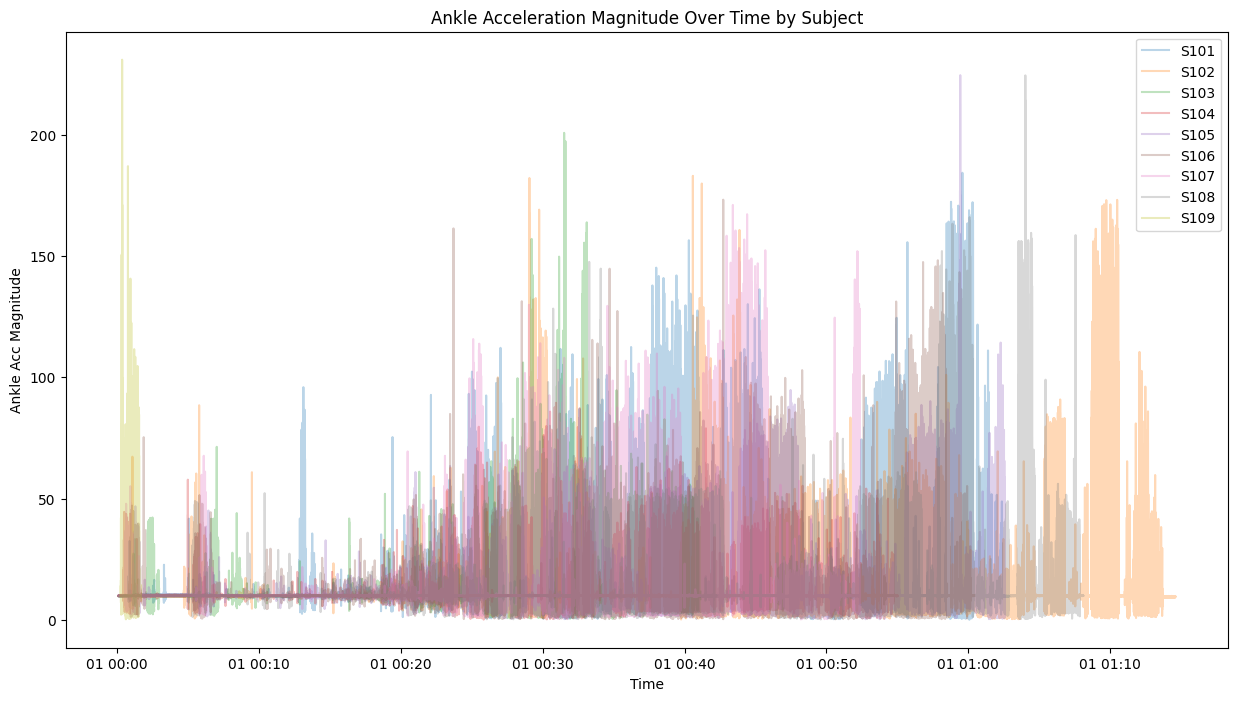

In [ ]:
# Accelerometer Drift (Ankle)
plt.figure(figsize=(15,8))

for sid in df['subject_id'].unique():
    sub = df[df['subject_id'] == sid]
    plt.plot(sub['datetime'], sub['ankle_acc_mag'], alpha=0.3, label=f"S{sid}")

plt.title("Ankle Acceleration Magnitude Over Time by Subject")
plt.xlabel("Time")
plt.ylabel("Ankle Acc Magnitude")
plt.legend()
plt.show()

In [ ]:
# Subject-Level Summary Statistics
subject_summary = df.groupby('subject_id').agg({
    'heart_rate': ['mean','std','min','max'],
    'ankle_acc_mag': ['mean','std'],
    'chest_acc_mag': ['mean','std'],
    'hand_acc_mag': ['mean','std']
})

subject_summary

heart_rate                             ankle_acc_mag             \
                 mean       std      min      max          mean        std   
subject_id                                                                   
101         32.428912  1.236819  30.0000  33.8750     12.029074   6.996151   
102         32.241076  2.103383  27.4375  34.6250     11.596222   6.191083   
103         31.694351  1.191588  28.0625  33.2500     11.656435   5.894083   
104         31.793707  1.795173  27.4375  33.7500     11.362009   4.521276   
105         34.726806  0.488918  33.7500  35.5000     12.271062   6.666630   
106         32.235847  2.042913  27.9375  34.1875     11.968420   6.701648   
107         32.942459  1.031391  29.1875  34.2500     12.109440   7.133284   
108         32.964541  1.618991  30.5625  34.8125     12.129373   7.237526   
109         25.017555  0.115631  24.7500  25.1875     16.828030  14.224496   

           chest_acc_mag            hand_acc_mag            
                    mean        std         mean       std  
subject_id                                                  
101            10.191324   3.975436    10.773256  5.023797  
102            10.152105   2.994420    10.555947  3.118693  
103             9.922849   2.177478    10.529987  2.480054  
104             9.955185   2.126014    10.182421  2.487374  
105            10.190863   3.600012    10.731602  4.985392  
106            10.109868   3.362223    11.390808  8.119901  
107             9.982908   2.292810    10.213617  3.864200  
108            10.150360   4.057130    10.759876  5.116739  
109            11.906719  10.657747    13.779229  8.777914

<Axes: title={'center': 'heart_rate'}, xlabel='subject_id'>

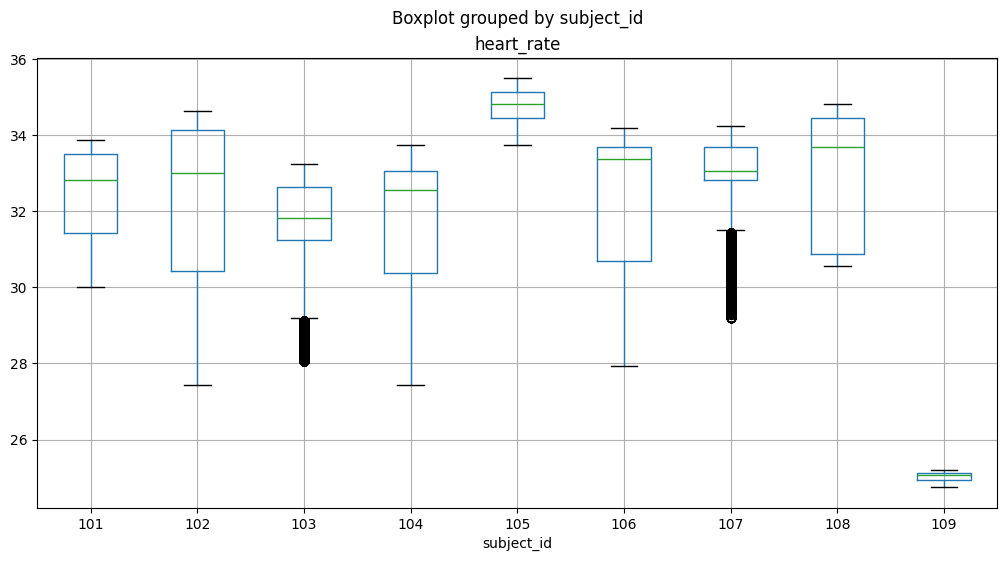

In [ ]:
# Box Plots Per Subject
# Heart Rate Boxplot
df.boxplot(column='heart_rate', by='subject_id', figsize=(12,6))

<Axes: title={'center': 'ankle_acc_mag'}, xlabel='subject_id'>

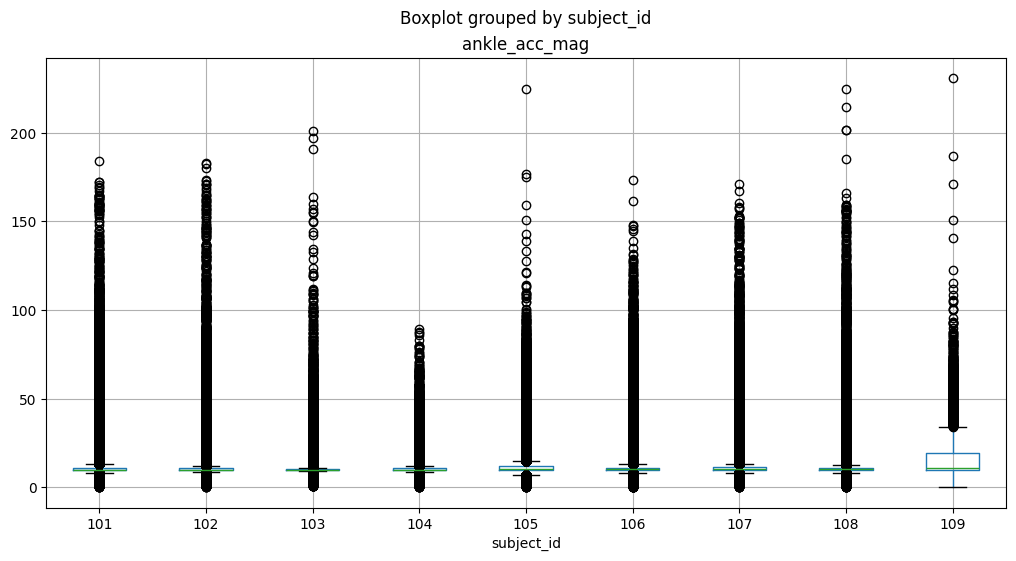

In [ ]:
# Acceleration Boxplot
df.boxplot(column='ankle_acc_mag', by='subject_id', figsize=(12,6))

Conclusion:
- Some subjects have higher HR baselines
- Some subjects have stronger movement patterns
- There is drift over time

All are normal and expected.

### **EDA SUMMARY FOR PAMAP2 WEARABLE SENSOR DATASET**

1. Dataset Overview

The merged dataset contains 2,872,533 observations and 55 usable columns after dropping the all-NaN ankle_orient_4 field.
It includes:

Heart rate

IMU data from hand, chest, and ankle sensors (accelerometer, gyroscope, magnetometer, orientation)

Activity labels

Subject identifiers

A timestamp and derived datetime column

The dataset represents nine participants performing various daily-life and fitness activities, sampled at 100 Hz.

2. Data Cleaning Steps

The following cleaning operations were completed:

Combined all nine subject files into one dataset with a subject_id column

Converted timestamp into a usable datetime column

Sorted data by subject_id and datetime

Identified and handled missing values using forward fill followed by backward fill within each subject

Dropped ankle_orient_4 because it contained 100% missing values

Verified no remaining NaNs in the dataset

The cleaned dataset is complete, chronologically ordered, and free of missing sensor values.

3. Activity Distribution

The activity labels present in the dataset were:

0, 1, 2, 3, 4, 5, 6, 7, 12, 13, 16, 17, 24

Mapped to:

ID	Activity
0	Unlabeled / transition activity
1	Lying
2	Sitting
3	Standing
4	Walking
5	Running
6	Cycling
7	Nordic Walking
12	Vacuum Cleaning
13	Ironing
16	Rope Jumping
17	Misc. household activity
24	Sensor warm-up / transition
Key Findings:

Activity 0 dominates the dataset, representing long transitional or unlabeled periods.

Structured activities (walking, running, vacuuming, etc.) are present but imbalanced.

This imbalance will require attention during ML model preparation.

4. Heart Rate Analysis

Two heart rate EDA plots were generated:

Findings:

Heart rate shows clear separation between activities, with higher-intensity activities (running, rope jumping) producing higher HR, and low-intensity activities (lying, sitting) producing lower HR.

Activity 0 has a wide HR range, confirming it mixes multiple behavioral states.

Activity 24 shows an unusually wide HR range, consistent with warm-up/movement-between-tasks behavior.

This confirms the dataset’s physiological signals are valid and activity-dependent.

5. Acceleration Magnitude Analysis

Acceleration magnitude (vector norms) was computed for hand, chest, and ankle sensors.

Findings:

Activities show clear separability based on acceleration magnitude.

Walking, running, cycling, and rope jumping produce high ankle acceleration.

Vacuum cleaning and ironing produce strong hand acceleration.

Chest sensor captures full-body movement with smoother patterns.

Activity 0 again shows a wide range, reinforcing its transitional nature.

These patterns support use of accelerometers for activity recognition.

6. Correlation Heatmap Analysis
Findings:

Heart rate shows only weak correlations with motion features, as expected:

Small positive correlation with hand movement

Smaller or slightly negative correlation with ankle movement

Strong correlations exist within each sensor group (hand, chest, ankle), especially among gyro axes.

Low correlations between sensors (hand ↔ chest ↔ ankle), which is expected since they track different body parts.

This confirms the signals are independent, well-behaved, and provide unique information.

7. Subject Drift and Individual Differences

Plots were generated for heart rate and ankle acceleration per subject.

Findings:

Subjects have different HR baselines, consistent with individual physiology.

Subjects display different movement intensities, reflecting natural biomechanical differences.

Some subjects show drift over time in HR or movement, consistent with:

sensor warming

fatigue accumulation

strap adjustments

No major noise, artifacts, or sensor failures were detected.

These findings suggest that per-subject normalization may be useful for ML modeling, especially for heart rate.

**Notes:**

- Some subjects have higher HR baselines. So be sure to normalize heart rate per subject. Here's the code for feature engineering:

df['hr_norm'] = df.groupby('subject_id')['heart_rate'].transform(
    lambda x: (x - x.mean()) / x.std()
)


# MODELING SECTION

## Train/Test Split and Validation

In [ ]:
#Filter out transition labels for a clean activity classifier
ACTIVITIES_TO_USE = sorted([a for a in df['activity_id_1'].unique() if a not in (0, 24)])
df_model = df[df['activity_id_1'].isin(ACTIVITIES_TO_USE)].copy()
df_model['activity_id_1'] = df_model['activity_id_1'].astype(int)

#Choose test subjects (20–30% of subjects)
rng = np.random.RandomState(42)
subjects = df_model['subject_id'].dropna().unique()
subjects = np.array(sorted(subjects))

test_frac = 0.2
n_test = max(1, int(round(len(subjects) * test_frac)))
test_subjects = rng.choice(subjects, size=n_test, replace=False)

train_subjects = np.array([s for s in subjects if s not in test_subjects])

df_train = df_model[df_model['subject_id'].isin(train_subjects)].copy()
df_test  = df_model[df_model['subject_id'].isin(test_subjects)].copy()

print("All subjects:", subjects)
print("Train subjects:", train_subjects, "(", len(train_subjects), ")")
print("Test subjects :", test_subjects, "(", len(test_subjects), ")")
print("Train rows:", len(df_train), "Test rows:", len(df_test))
print("\nTrain activity distribution (top 10):")
print(df_train['activity_id_1'].value_counts().head(10))
print("\nTest activity distribution (top 10):")
print(df_test['activity_id_1'].value_counts().head(10))


All subjects: [101 102 103 104 105 106 107 108]
Train subjects: [101 103 104 105 107 108] ( 6 )
Test subjects : [102 106] ( 2 )
Train rows: 1393585 Test rows: 499927

Train activity distribution (top 10):
activity_id_1
4     180507
17    172066
1     145753
3     139999
2     139802
16    133592
7     131682
6     119006
12     86583
13     78459
Name: count, dtype: int64

Test activity distribution (top 10):
activity_id_1
17    66624
4     58254
7     56425
3     49932
1     46770
6     45594
2     45386
16    41761
5     32063
12    30633
Name: count, dtype: int64


In [ ]:
if 'activity_id_1' in df_train.columns: # Remove any remaining transition labels
    df_train = df_train[~df_train['activity_id_1'].isin([0, 24])].copy()
    df_test  = df_test[~df_test['activity_id_1'].isin([0, 24])].copy()
    df_train['activity_id_1'] = df_train['activity_id_1'].astype(int)
    df_test['activity_id_1']  = df_test['activity_id_1'].astype(int)

for c in ['subject_id','activity_id_1','datetime']: # Ensure key columns exist
    assert c in df_train.columns and c in df_test.columns, f"Missing {c}"

print("Train subjects:", sorted(df_train['subject_id'].unique()))
print("Test subjects :", sorted(df_test['subject_id'].unique()))
print("Train rows:", len(df_train), "Test rows:", len(df_test))
print("Train activity counts (top 10):")
print(df_train['activity_id_1'].value_counts().head(10))
print("Test activity counts (top 10):")
print(df_test['activity_id_1'].value_counts().head(10))



Train subjects: [np.int64(101), np.int64(103), np.int64(104), np.int64(105), np.int64(107), np.int64(108)]
Test subjects : [np.int64(102), np.int64(106)]
Train rows: 1393585 Test rows: 499927
Train activity counts (top 10):
activity_id_1
4     180507
17    172066
1     145753
3     139999
2     139802
16    133592
7     131682
6     119006
12     86583
13     78459
Name: count, dtype: int64
Test activity counts (top 10):
activity_id_1
17    66624
4     58254
7     56425
3     49932
1     46770
6     45594
2     45386
16    41761
5     32063
12    30633
Name: count, dtype: int64


## Features

In [ ]:
 # Ensure acceleration magnitudes exist
def ensure_acc_magnitudes(dfx: pd.DataFrame) -> pd.DataFrame:
    dfx = dfx.copy()
    needed = [
        ('hand_acc16_x','hand_acc16_y','hand_acc16_z','hand_acc_mag'),
        ('chest_acc16_x','chest_acc16_y','chest_acc16_z','chest_acc_mag'),
        ('ankle_acc16_x','ankle_acc16_y','ankle_acc16_z','ankle_acc_mag')
    ]
    for ax, ay, az, mag in needed: # Compute magnitude if missing
        if mag not in dfx.columns and all(c in dfx.columns for c in [ax, ay, az]):
            dfx[mag] = np.sqrt(dfx[ax]**2 + dfx[ay]**2 + dfx[az]**2)
    return dfx

# Add normalized heart rate per subject
def add_hr_norm(dfx: pd.DataFrame, hr_col='heart_rate') -> pd.DataFrame:
    dfx = dfx.copy()
    if hr_col in dfx.columns:
        dfx['hr_norm'] = dfx.groupby('subject_id')[hr_col].transform( 
            lambda x: (x - x.mean()) / (x.std() + 1e-8)
        ) # avoid division by zero
    else: # heart_rate column missing
        dfx['hr_norm'] = np.nan
        print("WARNING: heart_rate not found; hr_norm will be NaN")
    return dfx

df_train = ensure_acc_magnitudes(df_train)
df_test  = ensure_acc_magnitudes(df_test)

df_train = add_hr_norm(df_train)
df_test  = add_hr_norm(df_test)

df_train = df_train.sort_values(['subject_id','datetime']).reset_index(drop=True)
df_test  = df_test.sort_values(['subject_id','datetime']).reset_index(drop=True)

print("Added magnitudes + hr_norm. Train/Test shapes:", df_train.shape, df_test.shape)



Added magnitudes + hr_norm. Train/Test shapes: (1393585, 60) (499927, 60)


In [ ]:
# Select Feature Columns
def pick_sensor_columns(df):
    base = ['hr_norm', 'hand_acc_mag', 'chest_acc_mag', 'ankle_acc_mag']

    acc_axes = [c for c in df.columns if re.search(r'(hand|chest|ankle)_acc16_[xyz]$', c)]
    gyro_axes = [c for c in df.columns if re.search(r'(hand|chest|ankle)_gyro_[xyz]$', c)]
    mag_axes  = [c for c in df.columns if re.search(r'(hand|chest|ankle)_mag_[xyz]$', c)]
    temp_cols = [c for c in df.columns if re.search(r'(hand|chest|ankle)_temp$', c)]

    cols = []
    for lst in [base, acc_axes, gyro_axes, mag_axes, temp_cols]:
        cols.extend([c for c in lst if c in df.columns])

    # remove duplicates preserving order
    seen = set()
    cols = [c for c in cols if not (c in seen or seen.add(c))]
    return cols

feature_cols = pick_sensor_columns(df_train)
feature_cols = [c for c in feature_cols if c in df_train.columns and c in df_test.columns]

print("Feature columns used:", len(feature_cols))
print(feature_cols[:40])

# drop NaNs on selected features
df_train = df_train.dropna(subset=feature_cols + ['activity_id_1','subject_id']).copy()
df_test  = df_test.dropna(subset=feature_cols + ['activity_id_1','subject_id']).copy()

print("After dropna -> Train rows:", len(df_train), "Test rows:", len(df_test))



Feature columns used: 34
['hr_norm', 'hand_acc_mag', 'chest_acc_mag', 'ankle_acc_mag', 'hand_acc16_x', 'hand_acc16_y', 'hand_acc16_z', 'chest_acc16_x', 'chest_acc16_y', 'chest_acc16_z', 'ankle_acc16_x', 'ankle_acc16_y', 'ankle_acc16_z', 'hand_gyro_x', 'hand_gyro_y', 'hand_gyro_z', 'chest_gyro_x', 'chest_gyro_y', 'chest_gyro_z', 'ankle_gyro_x', 'ankle_gyro_y', 'ankle_gyro_z', 'hand_mag_x', 'hand_mag_y', 'hand_mag_z', 'chest_mag_x', 'chest_mag_y', 'chest_mag_z', 'ankle_mag_x', 'ankle_mag_y', 'ankle_mag_z', 'hand_temp', 'chest_temp', 'ankle_temp']
After dropna -> Train rows: 1393585 Test rows: 499927


In [ ]:
'''
Downsampling: Makes window feature generation computationally feasible.
'''
DOWNSAMPLE_FACTOR = 10
# Downsample per subject to preserve class distribution
def downsample_per_subject(dfx, factor):
    return (dfx.groupby('subject_id', group_keys=False)
              .apply(lambda g: g.iloc[::factor])
              .reset_index(drop=True))

df_train_ds = downsample_per_subject(df_train, DOWNSAMPLE_FACTOR)
df_test_ds  = downsample_per_subject(df_test,  DOWNSAMPLE_FACTOR)

print("Downsampled rows: train", len(df_train_ds), "test", len(df_test_ds))


Downsampled rows: train 139361 test 49993


C:\Users\andre\AppData\Local\Temp\ipykernel_3972\2331664070.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.iloc[::factor])
C:\Users\andre\AppData\Local\Temp\ipykernel_3972\2331664070.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.iloc[::factor])


In [ ]:
'''
We transformed the downsampled wearable time series into supervised learning examples using sliding windows (10s, 50% overlap). 
For each window we extracted time-domain statistics, energy, jerk features, and coarse frequency-band energy from FFT, producing a fixed-length feature vector per window. 
We built windows only within constant activity segments to avoid label contamination, and stored the subject ID per window to enable GroupKFold cross-validation without subject leakage.
'''
# Window Feature Extraction
def window_features(w):
    mean = w.mean(axis=0)
    std  = w.std(axis=0)
    mn   = w.min(axis=0)
    mx   = w.max(axis=0)
    med  = np.median(w, axis=0)
    q75  = np.percentile(w, 75, axis=0)
    q25  = np.percentile(w, 25, axis=0)
    iqr  = q75 - q25

    energy = (w**2).mean(axis=0)

    jw = np.diff(w, axis=0)
    jerk_mean = jw.mean(axis=0)
    jerk_std  = jw.std(axis=0)
    jerk_energy = (jw**2).mean(axis=0)

    # FFT band energies
    wd = w - mean
    fft = np.fft.rfft(wd, axis=0)
    psd = (np.abs(fft)**2)
    mid = max(1, psd.shape[0] // 2)
    low_band = psd[:mid].mean(axis=0)
    high_band = psd[mid:].mean(axis=0)

    return np.concatenate([
        mean, std, mn, mx, med, iqr,
        energy,
        jerk_mean, jerk_std, jerk_energy,
        low_band, high_band
    ], axis=0)

def make_windows_no_crossing(df_in, feature_cols,
                             label_col='activity_id_1', group_col='subject_id',
                             win_size=100, step=50, max_windows_per_subject=None):
    X_list, y_list, g_list = [], [], []

    for sid, g in df_in.groupby(group_col, sort=False):
        g = g.sort_values('datetime')
        arr = g[feature_cols].to_numpy(dtype=np.float32)
        labels = g[label_col].to_numpy(dtype=np.int32)

        change_idx = np.where(labels[:-1] != labels[1:])[0] + 1
        starts = np.r_[0, change_idx]
        ends   = np.r_[change_idx, len(g)]

        n_added = 0
        for s, e in zip(starts, ends):
            seg_len = e - s
            if seg_len < win_size:
                continue

            seg_arr = arr[s:e]
            seg_label = labels[s]

            for st in range(0, seg_len - win_size + 1, step):
                w = seg_arr[st:st + win_size]
                X_list.append(window_features(w))
                y_list.append(seg_label)
                g_list.append(sid)

                n_added += 1
                if max_windows_per_subject is not None and n_added >= max_windows_per_subject:
                    break

            if max_windows_per_subject is not None and n_added >= max_windows_per_subject:
                break

    X = np.vstack(X_list) if X_list else np.empty((0, 1), dtype=np.float32)
    y = np.array(y_list, dtype=np.int32)
    groups = np.array(g_list, dtype=np.int32)
    return X, y, groups

SAMPLE_RATE = 100 // DOWNSAMPLE_FACTOR  # 10 Hz
WIN_SECONDS = 10
WIN_SIZE = WIN_SECONDS * SAMPLE_RATE    # 100 samples
STEP = WIN_SIZE // 2                    # 50% overlap

MAX_WINDOWS_PER_SUBJECT = 15000  # reduce if memory/time is an issue

X_train, y_train, g_train = make_windows_no_crossing(
    df_train_ds, feature_cols, win_size=WIN_SIZE, step=STEP, max_windows_per_subject=MAX_WINDOWS_PER_SUBJECT
)
X_test, y_test, g_test = make_windows_no_crossing(
    df_test_ds, feature_cols, win_size=WIN_SIZE, step=STEP, max_windows_per_subject=MAX_WINDOWS_PER_SUBJECT
)

print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("Train label dist (top 10):")
print(pd.Series(y_train).value_counts().head(10))

X_train: (2676, 408) X_test: (962, 408)
Train label dist (top 10):
4     353
17    335
1     284
3     272
2     269
16    258
7     256
6     231
12    156
13    135
Name: count, dtype: int64


## Models and Validation

In [ ]:
# Model Evaluation with GroupKFold because of subject differences
def evaluate_model_cv(model, X, y, groups):
    n_splits = min(5, len(np.unique(groups)))
    gkf = GroupKFold(n_splits=n_splits)
    f1s, bals = [], []

    for tr, va in gkf.split(X, y, groups):
        model.fit(X[tr], y[tr])
        pred = model.predict(X[va])
        f1s.append(f1_score(y[va], pred, average='macro'))
        bals.append(balanced_accuracy_score(y[va], pred))

    return np.mean(f1s), np.std(f1s), np.mean(bals), np.std(bals)

models = {
    "LinearSVC_balanced": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LinearSVC(class_weight="balanced"))
    ]),
    "LogReg_balanced": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=3000, class_weight="balanced", n_jobs=-1))
    ]),
    "ExtraTrees_balanced_subsample": ExtraTreesClassifier(
        n_estimators=800, n_jobs=-1, class_weight="balanced_subsample",
        random_state=42, min_samples_leaf=1
    ),
    "RandomForest_balanced_subsample": RandomForestClassifier(
        n_estimators=600, n_jobs=-1, class_weight="balanced_subsample",
        random_state=42, min_samples_leaf=2
    ),
    "HistGradientBoosting": HistGradientBoostingClassifier(
        max_depth=10, learning_rate=0.08, max_iter=400, random_state=42
    )
}

rows = []
for name, m in models.items():
    mf1, sf1, mbal, sbal = evaluate_model_cv(name, m, X_train, y_train, g_train)
    rows.append((name, mf1, sf1, mbal, sbal))

results_df = pd.DataFrame(rows, columns=["model","macro_f1_mean","macro_f1_std","bal_acc_mean","bal_acc_std"]) \
             .sort_values("macro_f1_mean", ascending=False)

results_df


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


,model,macro_f1_mean,macro_f1_std,bal_acc_mean,bal_acc_std
2,ExtraTrees_balanced_subsample,0.951308,0.031107,0.948341,0.030620
3,RandomForest_balanced_subsample,0.921696,0.065041,0.939229,0.040494
4,HistGradientBoosting,0.871659,0.114558,0.882783,0.101331
1,LogReg_balanced,0.853238,0.117535,0.876152,0.086248
0,LinearSVC_balanced,0.818779,0.133356,0.846958,0.098783


In [ ]:
gkf = GroupKFold(n_splits=min(5, len(np.unique(g_train)))) # for use in CV searches

svc_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LinearSVC(class_weight="balanced"))
])

svc_params = {"clf__C": np.logspace(-3, 2, 20)}  # 0.001..100

svc_search = RandomizedSearchCV(
    svc_pipe,
    svc_params,
    n_iter=12,
    scoring="f1_macro",
    cv=gkf.split(X_train, y_train, g_train),
    n_jobs=-1,
    random_state=42,
    verbose=1
)
svc_search.fit(X_train, y_train)

print("Best SVC params:", svc_search.best_params_)
print("Best SVC CV macro F1:", svc_search.best_score_)
best_svc = svc_search.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best SVC params: {'clf__C': np.float64(0.003359818286283781)}
Best SVC CV macro F1: 0.8827800834693544


### Models Summary

In [ ]:
best_name = results_df.iloc[0]["model"]
best_model = models[best_name]

best_model.fit(X_train, y_train)
pred_best = best_model.predict(X_test)

best_svc.fit(X_train, y_train)
pred_svc = best_svc.predict(X_test)

def summarize(name, y_true, y_pred):
    from sklearn.metrics import f1_score, balanced_accuracy_score
    print(f"\n{name}")
    print("TEST macro F1:", f1_score(y_true, y_pred, average="macro"))
    print("TEST balanced acc:", balanced_accuracy_score(y_true, y_pred))
    print(classification_report(y_true, y_pred, digits=4))

summarize(f"best model: {best_name}", y_test, pred_best)
summarize("Tuned LinearSVC", y_test, pred_svc)

# Confusion matrix
use_pred = pred_svc if f1_score(y_test, pred_svc, average="macro") >= f1_score(y_test, pred_best, average="macro") else pred_best

labels_sorted = sorted(np.unique(np.concatenate([y_train, y_test])))
cm = confusion_matrix(y_test, use_pred, labels=labels_sorted)
cm_norm = cm / (cm.sum(axis=1, keepdims=True) + 1e-8)

cm_df = pd.DataFrame(cm_norm, index=labels_sorted, columns=labels_sorted)
cm_df.head(15)


CV-best: ExtraTrees_balanced_subsample
TEST macro F1: 0.9507469932852293
TEST balanced acc: 0.9498627176570239
              precision    recall  f1-score   support

           1     1.0000    0.9778    0.9888        90
           2     0.9367    0.8409    0.8862        88
           3     1.0000    0.8351    0.9101        97
           4     0.8976    1.0000    0.9461       114
           5     1.0000    1.0000    1.0000        61
           6     0.9888    1.0000    0.9944        88
           7     1.0000    0.8727    0.9320       110
          12     0.9492    1.0000    0.9739        56
          13     1.0000    0.9574    0.9783        47
          16     0.8696    0.9877    0.9249        81
          17     0.8759    0.9769    0.9236       130

    accuracy                         0.9459       962
   macro avg     0.9562    0.9499    0.9507       962
weighted avg     0.9503    0.9459    0.9456       962


Tuned LinearSVC
TEST macro F1: 0.9492797701230294
TEST balanced acc: 0.947

,1,2,3,4,5,6,7,12,13,16,17
1,0.977778,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.011111,0.011111
2,0.000000,0.840909,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.068182,0.090909
3,0.000000,0.051546,0.835052,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.020619,0.092784
4,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.118182,0.0,0.009091,0.872727,0.000000,0.000000,0.000000,0.000000
12,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
13,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.042553,0.957447,0.000000,0.000000
16,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.012346,0.000000,0.987654,0.000000
